# Learn to Rehydrate a Tweetset

This notebook is part of a [tutorial on rehydrating Twitter data](https://github.com/HYTE-research/SAGE-data-hellobrother#learn-to-rehydrate-a-tweetset).

In [47]:
pip install twython

In [2]:
from twython import Twython

Insert you Twitter credentials to these four variables:

In [13]:
api_key = 'api_key_value' 
api_secret = 'api_secret_value'
access_token = 'access_token_value'
access_token_secret = 'access_secret_value'

To avoid sharing the credentials with this notebook, we will read the credentials from a JSON file.

To create the keychain.json file, copy keychain_template.json and rename it to keychain.json. Only run the following lines of code if you have the keychain file available.

In [18]:
import json

with open('keychain.json') as f:
    keychain = json.load(f)

api_key = keychain['API_KEY']
api_secret = keychain['API_SECRET']
access_token = keychain['ACCESS_TOKEN']
access_secret = keychain['ACCESS_SECRET']

Connecting to Twitter API:

In [19]:
twitter = Twython(api_key, api_secret, access_token, access_secret)

In [20]:
tweet = twitter.show_status(id='1106397870628847617', include_entities=True)

In [21]:
tweet

{'created_at': 'Fri Mar 15 03:33:02 +0000 2019',
 'id': 1106397870628847617,
 'id_str': '1106397870628847617',
 'text': 'What has happened in Christchurch is an extraordinary act of unprecedented violence. It has no place in New Zealand… https://t.co/XOHF9hHe8H',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/XOHF9hHe8H',
    'expanded_url': 'https://twitter.com/i/web/status/1106397870628847617',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 22959763,
  'id_str': '22959763',
  'name': 'Jacinda Ardern',
  'screen_name': 'jacindaardern',
  'location': 'Auckland, New Zealand',
  'description': "Prime Minister of NZ. Leader

In [22]:
tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [48]:
pip install twarc

You have to confire twarc on the command line. Alternatively, you can define the four credentials as command line parameters:

In [49]:
!twarc --consumer_key CONSUMER_KEY --consumer_secret CONSUMER_SECRET --access_token ACCESS_TOKEN --access_token_secret ACCESS_TOKEN_SECRET version

twarc v2.7.3


As you can see, you are able to run twarc (or any command line tool) as part of the notebook by adding an exclamation mark (!) before the command.

You may have several different sets of credentials configured for twarc. In case you have only one configuration, remove <code>--profile</code> parameter and its value <code>ProfileName</code>:

In [26]:
!twarc --profile ProfileName hydrate hellobrother_idlist.txt > hellobrother_rehydrated.jsonl

Let's use [Pandas](https://pandas.pydata.org/) to manage the rehydrated tweetset in tabular format:

In [28]:
import pandas as pd

Reading the data in [JSON Lines](https://jsonlines.org/) and creating a Pandas [DataFrame](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe):

In [29]:
with open('hellobrother_rehydrated.jsonl') as f:
    tweets_jsonl = f.read()
    
df_hydrated = pd.DataFrame([json.loads(jline) for jline in tweets_jsonl.splitlines()])

Exploring the DataFrame:

In [30]:
df_hydrated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25497 entries, 0 to 25496
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 25497 non-null  object 
 1   id                         25497 non-null  int64  
 2   id_str                     25497 non-null  object 
 3   full_text                  25497 non-null  object 
 4   truncated                  25497 non-null  bool   
 5   display_text_range         25497 non-null  object 
 6   entities                   25497 non-null  object 
 7   source                     25497 non-null  object 
 8   in_reply_to_status_id      1731 non-null   float64
 9   in_reply_to_status_id_str  1731 non-null   object 
 10  in_reply_to_user_id        1814 non-null   float64
 11  in_reply_to_user_id_str    1814 non-null   object 
 12  in_reply_to_screen_name    1814 non-null   object 
 13  user                       25497 non-null  obj

Calculating the proportion of missing data:

In [31]:
len(df_hydrated.index)/43659*100

58.400329828901256

Exploring hashtags:

In [37]:
pd.set_option('display.max_colwidth', None) # Avoid truncating cell content
df_hydrated.entities.head()

0                                                                                                                                                               {'hashtags': [{'text': 'christchurch', 'indices': [172, 185]}, {'text': 'hellobrother', 'indices': [186, 199]}, {'text': 'racism', 'indices': [200, 207]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/T64z4nygHZ', 'expanded_url': 'https://twitter.com/F9ata/status/1106467090373005312', 'display_url': 'twitter.com/F9ata/status/1…', 'indices': [208, 231]}]}
1    {'hashtags': [{'text': 'Christianist', 'indices': [99, 112]}, {'text': 'Christian', 'indices': [122, 132]}, {'text': 'terrorists', 'indices': [134, 145]}, {'text': 'Muslim', 'indices': [157, 164]}, {'text': 'HelloBrother', 'indices': [223, 236]}, {'text': 'ChristchurchMosqueAttack', 'indices': [237, 262]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/S9MEptz9fw', 'expanded_url': 'https://twitter.com/IlmFeed/status/110647434393516

Helper function for extracting hashtags:

In [39]:
def extract_hashtags(entities):
    hashtags = list()
    
    for hashtag in entities['hashtags']:
        hashtags.append(hashtag['text'])

    return hashtags 

Extracting hashtags with the [apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)-function:

In [41]:
df_hydrated['hashtags'] = df_hydrated.entities.apply(extract_hashtags)
df_hydrated.hashtags

0                                                               [christchurch, hellobrother, racism]
1              [Christianist, Christian, terrorists, Muslim, HelloBrother, ChristchurchMosqueAttack]
2                                                   [racism, HelloBrother, ChristchurchMosqueAttack]
3                                                                                     [hellobrother]
4                                                                       [hellobrother, Christchurch]
                                                    ...                                             
25492                                 [RaniMukerji, HelloBrother, SalmanKhan, 20YearsOfHelloBrother]
25493                                                                                 [HelloBrother]
25494                                                                  [FridayFeeling, Hellobrother]
25495                                       [ShailajareddyAlludu, hellobrother, 10YearsForC

Creating a single list of hashtag values with a helper function from [tutorial on dealing with list values in Pandas DataFrames](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173): 

In [43]:
def to_1D(series):
    return pd.Series([x.lower() for _list in series for x in _list])

In [44]:
df_hashtags = pd.DataFrame(to_1D(df_hydrated.hashtags).value_counts(), columns=['count'])
df_hashtags['hashtag'] = df_hashtags.index

Top 10 hashtags:

In [45]:
df_hashtags.head(10)

,count,hashtag
hellobrother,25851,hellobrother
newzealandterroristattack,3050,newzealandterroristattack
christchurch,2342,christchurch
newzealand,1827,newzealand
حادث_نيوزيلندا_الارهابي,996,حادث_نيوزيلندا_الارهابي
هجوم_نيوزلندا_الارهابي,829,هجوم_نيوزلندا_الارهابي
christchurchterroristattack,734,christchurchterroristattack
newzealandshooting,637,newzealandshooting
newzealandmosqueattack,556,newzealandmosqueattack
christchurchmosqueattack,533,christchurchmosqueattack


Top 10 hashtags as bar chart:

<AxesSubplot:ylabel='hashtag'>

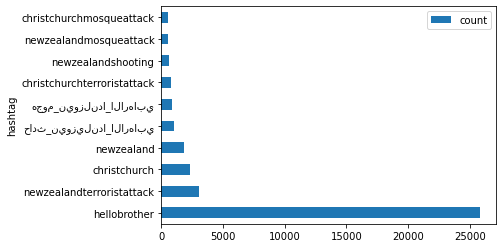

In [46]:
df_hashtags.head(10).plot.barh(y='count', x='hashtag')